<a href="https://colab.research.google.com/github/yuree89/practice/blob/main/practice0106_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#practice (조별활동)

In [ ]:
# 함수 불러오기

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #train set / test set 나눠서 작동
from sklearn.model_selection import cross_val_score # cross_val_score : 교차검증 함수
from sklearn.neighbors import KNeighborsRegressor # KNeighborsRegressor : 최근접 이웃 회귀

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Ubion/Ashopping2.csv", encoding = "cp949")
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


#데이터 밸런싱
오버샘플링, 언더샘플링

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [7]:
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [8]:
df.dropna(axis = 0, inplace = True)  #행의 결측값 제거

In [9]:
from sklearn.feature_selection import SelectKBest, chi2  #feature = 특성, 독립변수

#데이터 지정(변수)
X = df.drop(["고객ID", "친절성"], axis = 1)
Y = df["친절성"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [10]:
X_train.isnull().sum()

이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
dtype: int64

In [11]:
#일변량 통계기반 변수 선택
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_ #Chi2 = 카이제곱 값 (범주형)
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support() #support = '이거 써도 된다' 의미
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
24,9.939681,8.722440e-08,True,상품_다양성
25,11.873868,2.792788e-09,True,가격_적절성
27,9.478387,1.985858e-07,True,상품_설명_표시
29,13.893850,7.836666e-11,True,공간_편의성
30,11.349794,7.084399e-09,True,시야_확보성
32,25.474222,1.797690e-19,True,안내_표지판_설명
33,45.708827,2.068609e-33,True,신속성
34,22.549852,2.461308e-17,True,책임성
35,32.863328,9.918917e-25,True,정확성
36,47.079122,2.645028e-34,True,전문성


In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier #ensemble = 다양한 모형 모아서/ 배깅-병렬 부스팅-직렬 모형 나뉨

selector = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state= 0), threshold= "median") #RandomForestClassifier = 의사결정나무
#100개 의사결정 모델, threshold = 기준점, 성능 높일지 낮출지 결정 보통 median 중간값 사용
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
1,총_매출액,True
2,방문빈도,True
3,1회_평균매출액,True
5,총_할인_금액,True
13,거래기간,True
15,멤버쉽_프로그램_가입전_만족도,True
20,상품_만족도,True
24,상품_다양성,True
25,가격_적절성,True
26,상품_진열_위치,True


In [13]:
#언더 샘플링 #보통 있는 샘플로만 사용
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("uner train data %s" % Counter(Y_train_under))  

original data Counter({6: 311, 5: 296, 4: 143, 7: 76, 3: 15})
original train data Counter({6: 221, 5: 207, 4: 98, 7: 51, 3: 11})
uner train data Counter({3: 11, 4: 11, 5: 11, 6: 11, 7: 11})


위의 값을 통해 '친절성'의 언더 샘플링 값은 11임을 확인

In [14]:
#오버 샘플링 #샘플 더 만들어서 사용 (resample)
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling technique

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("over train data %s" % Counter(Y_train_over))

original data Counter({6: 311, 5: 296, 4: 143, 7: 76, 3: 15})
original train data Counter({6: 221, 5: 207, 4: 98, 7: 51, 3: 11})
over train data Counter({5: 221, 4: 221, 6: 221, 3: 221, 7: 221})


위의 값을 통해 '친절성'의 오버 샘플링 값은 221

처음에 언더/오버 샘플링을 할때 종속변수를 '방문빈도'로 넣고 진행했었는데 
계속 에러가 나서 확인해보니 해당 샘플링은 범주형 변수로 진행한다는 걸 후에 알고 '친절성'을 넣어서 재확인해보니 이상없이 데이터가 잘 나왔다... 주말에 겨우 확인함...퓨

In [15]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

# 선형 회귀분석

In [16]:
import seaborn as sns
import numpy as np

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

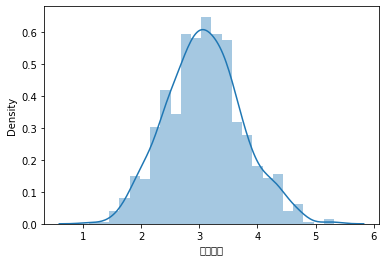

In [17]:
df["방문빈도"] = np.log1p(df["방문빈도"]) #로그 적용하여 방문빈도 그래프 확인
sns.distplot(df["방문빈도"])

In [18]:
df["방문빈도"].describe()

count    841.000000
mean       3.083974
std        0.651255
min        1.098612
25%        2.639057
50%        3.091042
75%        3.496508
max        5.318120
Name: 방문빈도, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder # OneHotEncoder = 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시

num = ['총_매출액', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액', '구매_카테고리_수', 'Frequency', 'Monetary']  #숫자변수
cg = ['고객등급', '구매유형', '클레임접수여부', '거주지역', '성별', '고객_나이대'] #카테고리

X = df[num + cg]
Y = df["방문빈도"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train)  #데이터 확인

[[-0.48005701  0.48290961  1.64847786 ...  0.          0.
   0.        ]
 [ 0.04929347  0.48556143 -1.08229315 ...  0.          0.
   0.        ]
 [-0.53660505  0.08644619 -0.13245976 ...  0.          1.
   0.        ]
 ...
 [-0.53247127  1.24825263  1.05483198 ...  0.          0.
   0.        ]
 [-0.58949336 -0.09556956  0.93610281 ...  0.          0.
   0.        ]
 [ 0.77014935  0.28002094 -1.3197515  ...  0.          1.
   0.        ]]


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt #sqrt = 루트값

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #보려고 하는 데이터            #성능확인-r제곱은 평균보다 잘 설명된 값
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) #굳이 필요없지만 확인한 것

rmse = sqrt(mean_squared_error(Y_test, Y_pred))  #test값은 여기서도 확인할 수있음
print("RMSE : {:.3f}".format(rmse)) #오차의 합 0에 가까울수록 좋다

predict value
 [2.74267578 3.16772461 3.26574707 2.25158691 3.2331543  3.76916504
 2.17370605 3.8059082  2.24328613 1.77441406 2.69689941 2.26794434
 4.65905762 2.11657715 2.60070801 2.20739746 4.10888672 3.18212891
 2.77563477 3.6315918  3.65185547 2.66394043 2.17419434 4.29199219
 2.22973633 2.72106934 2.68518066 3.0345459  2.80993652 2.04541016
 2.68432617 2.65698242 3.6751709  1.5513916  2.75891113 3.04443359
 2.63500977 2.73535156 3.53051758 3.74816895 3.73156738 3.76220703
 3.65661621 2.5670166  3.28881836 3.7364502  3.98327637 2.79431152
 3.13476562 3.15466309 3.69213867 2.83239746 3.05371094 2.74328613
 3.04516602 3.22766113 3.16320801 3.85510254 4.00671387 3.7722168
 3.75976562 2.63793945 4.22497559 3.18237305 4.27648926 2.75439453
 2.22851562 2.31982422 2.18054199 3.16662598 3.87719727 2.74206543
 4.12280273 2.8190918  3.48535156 3.72375488 2.79321289 2.24572754
 2.75427246 2.6751709  3.71484375 3.21337891 3.59082031 2.71533203
 2.84973145 2.19348145 3.84326172 4.62426758 2.1

train 값이 95% 정도로 1에 가깝기 때문에 정확도가 높음을 알수 있음 확인.

RMSE 값이 0에 가깝기 때문에 방문빈도의 모델이 실제 모델을 잘 예측했음을 알 수 있다. 

In [21]:
num = ['총_매출액', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액', '구매_카테고리_수', 'Frequency', 'Monetary']
#숫자변수
cg = ['고객등급', '구매유형', '클레임접수여부', '거주지역', '성별', '고객_나이대'] #카테고리

print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 -582970096383.628
가중치(beta) [ 8.70000000e-02 -1.19000000e-01  2.00000000e-03 -3.00000000e-03
  1.00088722e+10  4.56000000e-01  8.00000000e-02 -1.56784633e+11
 -2.19064349e+10  5.45038779e+11  5.45038779e+11  5.45038779e+11
  5.45038779e+11  5.68610731e+10  5.68610731e+10 -1.26750214e+10
 -2.12044645e+10 -2.97339076e+10 -3.82633507e+10  8.80854045e+10
  7.95559614e+10  7.10265183e+10  2.61207247e+10  2.61207247e+10
  2.46641585e+10  2.46641585e+10  2.46641585e+10  2.46641585e+10
  2.46641585e+10  2.46641585e+10  2.46641585e+10  2.46641585e+10
  2.46641585e+10]
